# Adversial Robustness 
# Adversial ensemble learning using convernional image rectification 

In [24]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
import torch
import torchvision

from collections import Counter

Define runtime parameter

In [162]:
n_epochs = 20
batch_size_train = 32
batch_size_test = 32
learning_rate = 0.01
momentum = 0.5

random_seed = 1337
torch.backends.cudnn.enabled = True
torch.manual_seed(random_seed)

Load MNIST Dataset from torchvision

In [163]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [164]:
print(train_loader.dataset.train_data.size())
print(test_loader.dataset.test_data.size())

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


F:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
F:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [166]:
nr_train = np.array([])
for i, (data, target) in enumerate(train_loader):
    nr_train=np.append(nr_train, target.cpu().detach().numpy())

nr_test = np.array([])
for i, (data, target) in enumerate(test_loader):
    nr_test=np.append(nr_test, target.cpu().detach().numpy())

In [167]:
Counter(np.sort(nr_train))

Counter({0.0: 5923,
         1.0: 6742,
         2.0: 5958,
         3.0: 6131,
         4.0: 5842,
         5.0: 5421,
         6.0: 5918,
         7.0: 6265,
         8.0: 5851,
         9.0: 5949})

In [168]:
Counter(np.sort(nr_test))

Counter({0.0: 980,
         1.0: 1135,
         2.0: 1032,
         3.0: 1010,
         4.0: 982,
         5.0: 892,
         6.0: 958,
         7.0: 1028,
         8.0: 974,
         9.0: 1009})

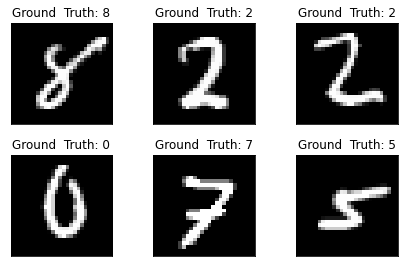

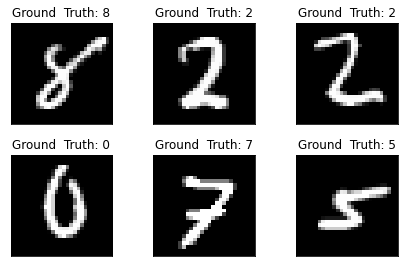

In [171]:
examples = enumerate(test_loader,start=0)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground  Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig